<a href="https://colab.research.google.com/github/abhilash1910/AI-Geometric-Learning/blob/master/Chapter_2_Understanding_the_data/InformationGeometry_MDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Multi Dimensional Scaling

MDS is a dimensionality reduction algorithm very much similar to PCA  and relies on linear projection of vectors for minimizing the manifolds. MDS preserves the distance measures which are replicated from higher dimension to lower dimensional data. This is known as a pairwise similarity matrix which preserves spatial representations between any 2 vectors. 

MDS differs from many other dimensionality reduction methods in that the input to MDS is only the dissimilarity matrix, instead of the actual position vectors of the data. Given a pairwise dissimilarity matrix $D$ with entries $d_{i,j}$ 
 for the distance/dissimilarity between observations $i$ and $j$ , we find $x_{1},....,x_{n} \in R^{k}$ such that:

$$d_{i,j}^{2} \approx ||x_{i}-x_{j}||^{2}$$

We find a configuration (typically a lower dimensional configuration in $R^{2}$ ) that keeps the Euclidean distances in $R^{k}$ as close as possible to our original distances/similarities.

Note: MDS considers global similarities by attempting to preserve all the pairwise distances (instead of preserving local neighborhood similarities like many other manifold learning algorithms), and this limits the ability of MDS to produce non-linear embeddings.

Note: the original distances  in $D$ do not have to be Euclidean distances. They can be pairwise dissimilarities, even for qualitative comparisons between any type of objects. The algorithm will be slightly modified when the original distances are Euclidean (classical MDS) vs. non-Euclidean or even direct qualitative similarities (general metric or non-metric MDS).

#### Steps for MDS:

- Gram Matrix and Centering: We create a pairwise dissimilarity matrix and find the Gram Matrix as $B \in R^{nXn}$. Double centering is required to incorporate translational invariance , which is done by centering the gram matrix to 0 and subtracting row and column means from each entry: 

   $$C_{n}=I_{n} - 1/n 11^{T}$$

  where $I$ is an identity matrix and $11$ indicates a numpy matrix of ones of  dimension $nXn$. The compressed form of centering is denoted as :
   
   $$B= -1/2 C_{n}D^{2}C_{n}$$

- Finding the eigenvalues and eigen vectors: The next step is to find the eigen values $\lambda$ and eigen vectors $v$ of the gram matrix and form matrices $X= diag(\lambda_{1},.....,\lambda_{n})$ and $V_{n}=(v_{1},.....,v_{n})$

- Projecting to lower dimensional embeddings: We use the top k eigen vectors $v_{1},...v_{k}$ and the decomposition $Y= V_{k}\sqrt(X_{k})$ to form matrix with lower dimensional vectors in $Y$

In this case, we are using standard Euclidean metric as distance measure for the MDS.

### Metric and Non Metric MDS

There are many different variants of MDS that can be applied in different situations, and so the broad categories are only briefly covered below.

- Metric MDS - dissimilarities are quantitative but not necessarily Euclidean (classical MDS is a special case)

For metric MDS, we have loss function defined as:

$$Stress_{D}(x_{1},......,x_{n})= ( \sum_{i \neq j =1,..,N} (d_{i,j}- ||x_{i}-x_{j}||)^2)^{1/2}$$

We attempt to find the configuration $x_{1},...x_{n}$ to minimize this error given our input matrix 

- Non-metric MDS - dissimilarities are qualitative (similarity measures are interpreted more as rankings or ordinal classifications)

In the non-metric case, the dissimilarity matrix we are given is only important in its relative ranking of the observations, not the quantitative degree to which observations differ. For non-metric MDS, we have a monotonic function  and we find a configuration that only preserves relative ranking of the data.

If $d_{ij}<d_{ik} → f(d_{ij}) < f(d_{ik})$

Non-metric MDS can also be stated as the problem of finding the optimal configuration $x_{1},....,x_{n} \in R^{k}$ that minimizes the following loss function:

$$Stress_{D}(x_{1},......,x_{n})= \sqrt(\sum(f(x)-D)^{2})/∑(d^{2})$$




## Implementation of Classic MDS

In this case we are implementing the MDS algorithm to test on the sklearn IRIS dataset and to see how the reduction of dimension is being done.  As mentioned in the previous section, we are going to reduce the dimension by double centering the gram matrix and extracting the top k eigenvectors/values for representation. 

<class 'numpy.ndarray'> (150, 150)


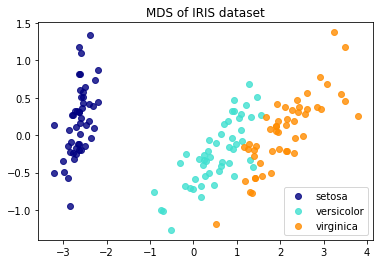

In [2]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
from sklearn.datasets import load_iris


class MDS():
  #Base class for MDS 
  def __init__(self,D,n_components=[]):
    #initialization for getting the length of the original components and the final required components
    self.D=D
    self.n=len(D)
    self.n_components=n_components
  
  def one_centering(self):
    #double centering using  subtraction from identity matrix for translational invariance
    I=np.identity(self.n)
    O=np.ones((self.n,self.n))
    self.H=I-O/self.n
    return self.H

  def double_centering(self):
    #extended part of the double centering method
    self.H=-self.H.dot(self.D**2).dot(self.H)/2
    return self.H
  
  def get_eigens(self):
    #getting the eigenvalues and vectors similar to PCA
    self.evals,self.evecs=np.linalg.eigh(self.H)
    idx=np.argsort(self.evals)[::-1]
    self.evals=self.evals[idx]
    self.evecs=self.evecs[:,idx]
    w,=np.where(self.evals>0)
    if self.n_components!=[]:
      evs=self.evals
      w_modif=evs.argsort()[-self.n_components:][::-1]
      if np.any(self.evals[w_modif]<0):
        print(f"Not possible to get components  for the {self.n_components}")
        return []
    self.L=np.diag(np.sqrt(self.evals[w]))
    self.V=self.evecs[:,w]
    self.Y= self.V.dot(self.L)
    return self.Y

if __name__=='__main__':
  '''In this case, we are testing the reduction capabilities on the sklearn iris dataset.
    We are reducing the final dimensions to 2 such that we can plot the classes . In the initial stage
    we are using the Euclidean distance as the measure.'''

  iris = load_iris()
  X = iris.data
  y = iris.target
  target_names = iris.target_names
  D = distance.cdist(X, X, 'euclidean')
  print(type(D),D.shape)
  mds=MDS(D,2)
  H=mds.one_centering()
  H=mds.double_centering()
  Y=mds.get_eigens()
  plt.figure()
  colors = ['navy', 'turquoise', 'darkorange']
  # plotting the iris dataset in the reduced manifold
  for color, i, target_name in zip(colors, [0, 1, 2], target_names):
      plt.scatter(Y[y == i, 0], Y[y == i, 1], alpha=.8, color=color,label=target_name)
  plt.legend(loc='best', shadow=False, scatterpoints=1)
  plt.title('MDS of IRIS dataset')
  plt.show()

## MDS compression on Swiss roll data 

MDS (metric/non metric) preserves local semantic pairwise distances for compressing 3d data into 2d data. The Swiss roll compression by MDS is shown in this case:
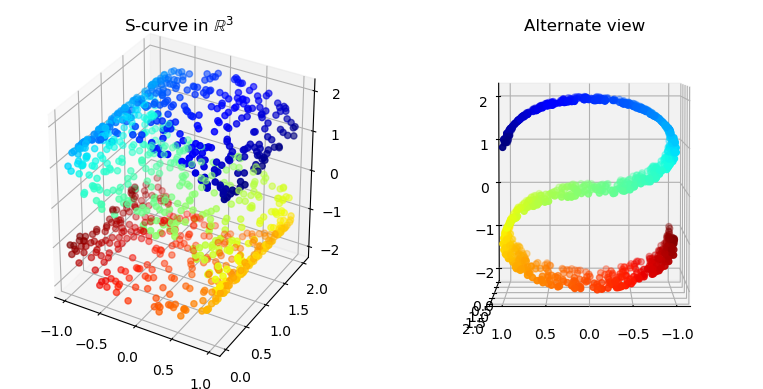

The corresponding MDS optimization: 

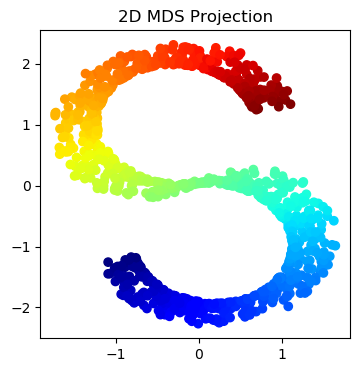



## MDS for Semantic Similarity

In this case, we are using MDS for determining semantic similarity between different words (food items). Intially we are using Jaccard scores for the pairwise distance metrics, and then we use the MDS to reduce the dimensions to 2. 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


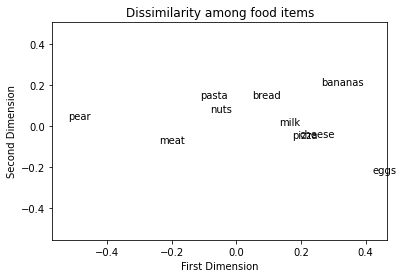

In [6]:
from sklearn.metrics import pairwise_distances

if __name__=='__main__':
  #Jaccard distance metric 
  foods_binary = np.random.randint(2, size=(100, 10)) #initial dataset
  dis_matrix = pairwise_distances(foods_binary, metric = 'jaccard')
  #Performing MDS through the steps
  mds=MDS(dis_matrix,2)
  H=mds.one_centering()
  H=mds.double_centering()
  Y=mds.get_eigens()
  # Getting the reduced eigen values and matrices and plotting the semantic similarity
  food_names = ['pasta', 'pizza', 'meat', 'eggs', 'cheese', 'bananas', 'pear', 'bread', 'nuts', 'milk']
  plt.figure()
  plt.scatter(Y[:,0],Y[:,1],facecolors = 'none', edgecolors = 'none')  
  labels = food_names
  for label, x, y in zip(labels, Y[:,0], Y[:,1]):
      plt.annotate(label, (x,y), xycoords = 'data')
  plt.xlabel('First Dimension')
  plt.ylabel('Second Dimension')
  plt.title('Dissimilarity among food items')    
  plt.show()


## Resources

Some resources for mathematical proofs of MDS:
- [MDS](https://www.hongfeili.com/files/paper100/paper4.pdf)
- [Github](https://github.com/drewwilimitis/Manifold-Learning)